In [1]:
import helper
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import random as rd

In [2]:
#goal simulate labeling patterns

n=100
c13ab = 0.011 #natural abundance
N = [(1-c13ab)**2,2*(1-c13ab)*c13ab,c13ab**2] #get expected labeling of precursor from natural abundance
isa_func = helper.palmitateISA

gs = np.random.random(n)
ds = np.random.random(n)
T = [0,0,1]
noiseFrac = .00

In [3]:
labeling_theo = []
for g,d in zip(gs,ds):
    labeling_theo.append(isa_func(g,d,T,N,None))
labeling_theo = np.array(labeling_theo)

In [4]:
r2_dict = {}

for noiseFrac in np.linspace(0,1,15):

    g_preds = []
    d_preds = []
    l_preds = []
    l_observed = []
    l_theo = []

    for g,d,l_true in zip(gs,ds,labeling_theo):
        noise = np.random.random(l_true.shape)
        noise = noiseFrac * noise / np.sum(noise)
        l_obs = [l+ns for l,ns in zip(l_true,noise)]
        l_obs = np.array(l_obs)/np.sum(l_obs)

        g_pred, d_pred, _, err, l_pred = helper.ISAFit_classical(T,N,l_obs,isa_func,list(range(len(l_obs))),np.array([.5,.5]))
        g_preds.append(g_pred)
        d_preds.append(d_pred)
        l_preds += list(l_pred)
        l_observed += list(l_obs)
        l_theo += list(l_true)

    r2_dict[noiseFrac] = {}

    r2_dict[noiseFrac]["g"] = r2_score(gs,g_preds)
    r2_dict[noiseFrac]["d"] = r2_score(ds,d_preds)

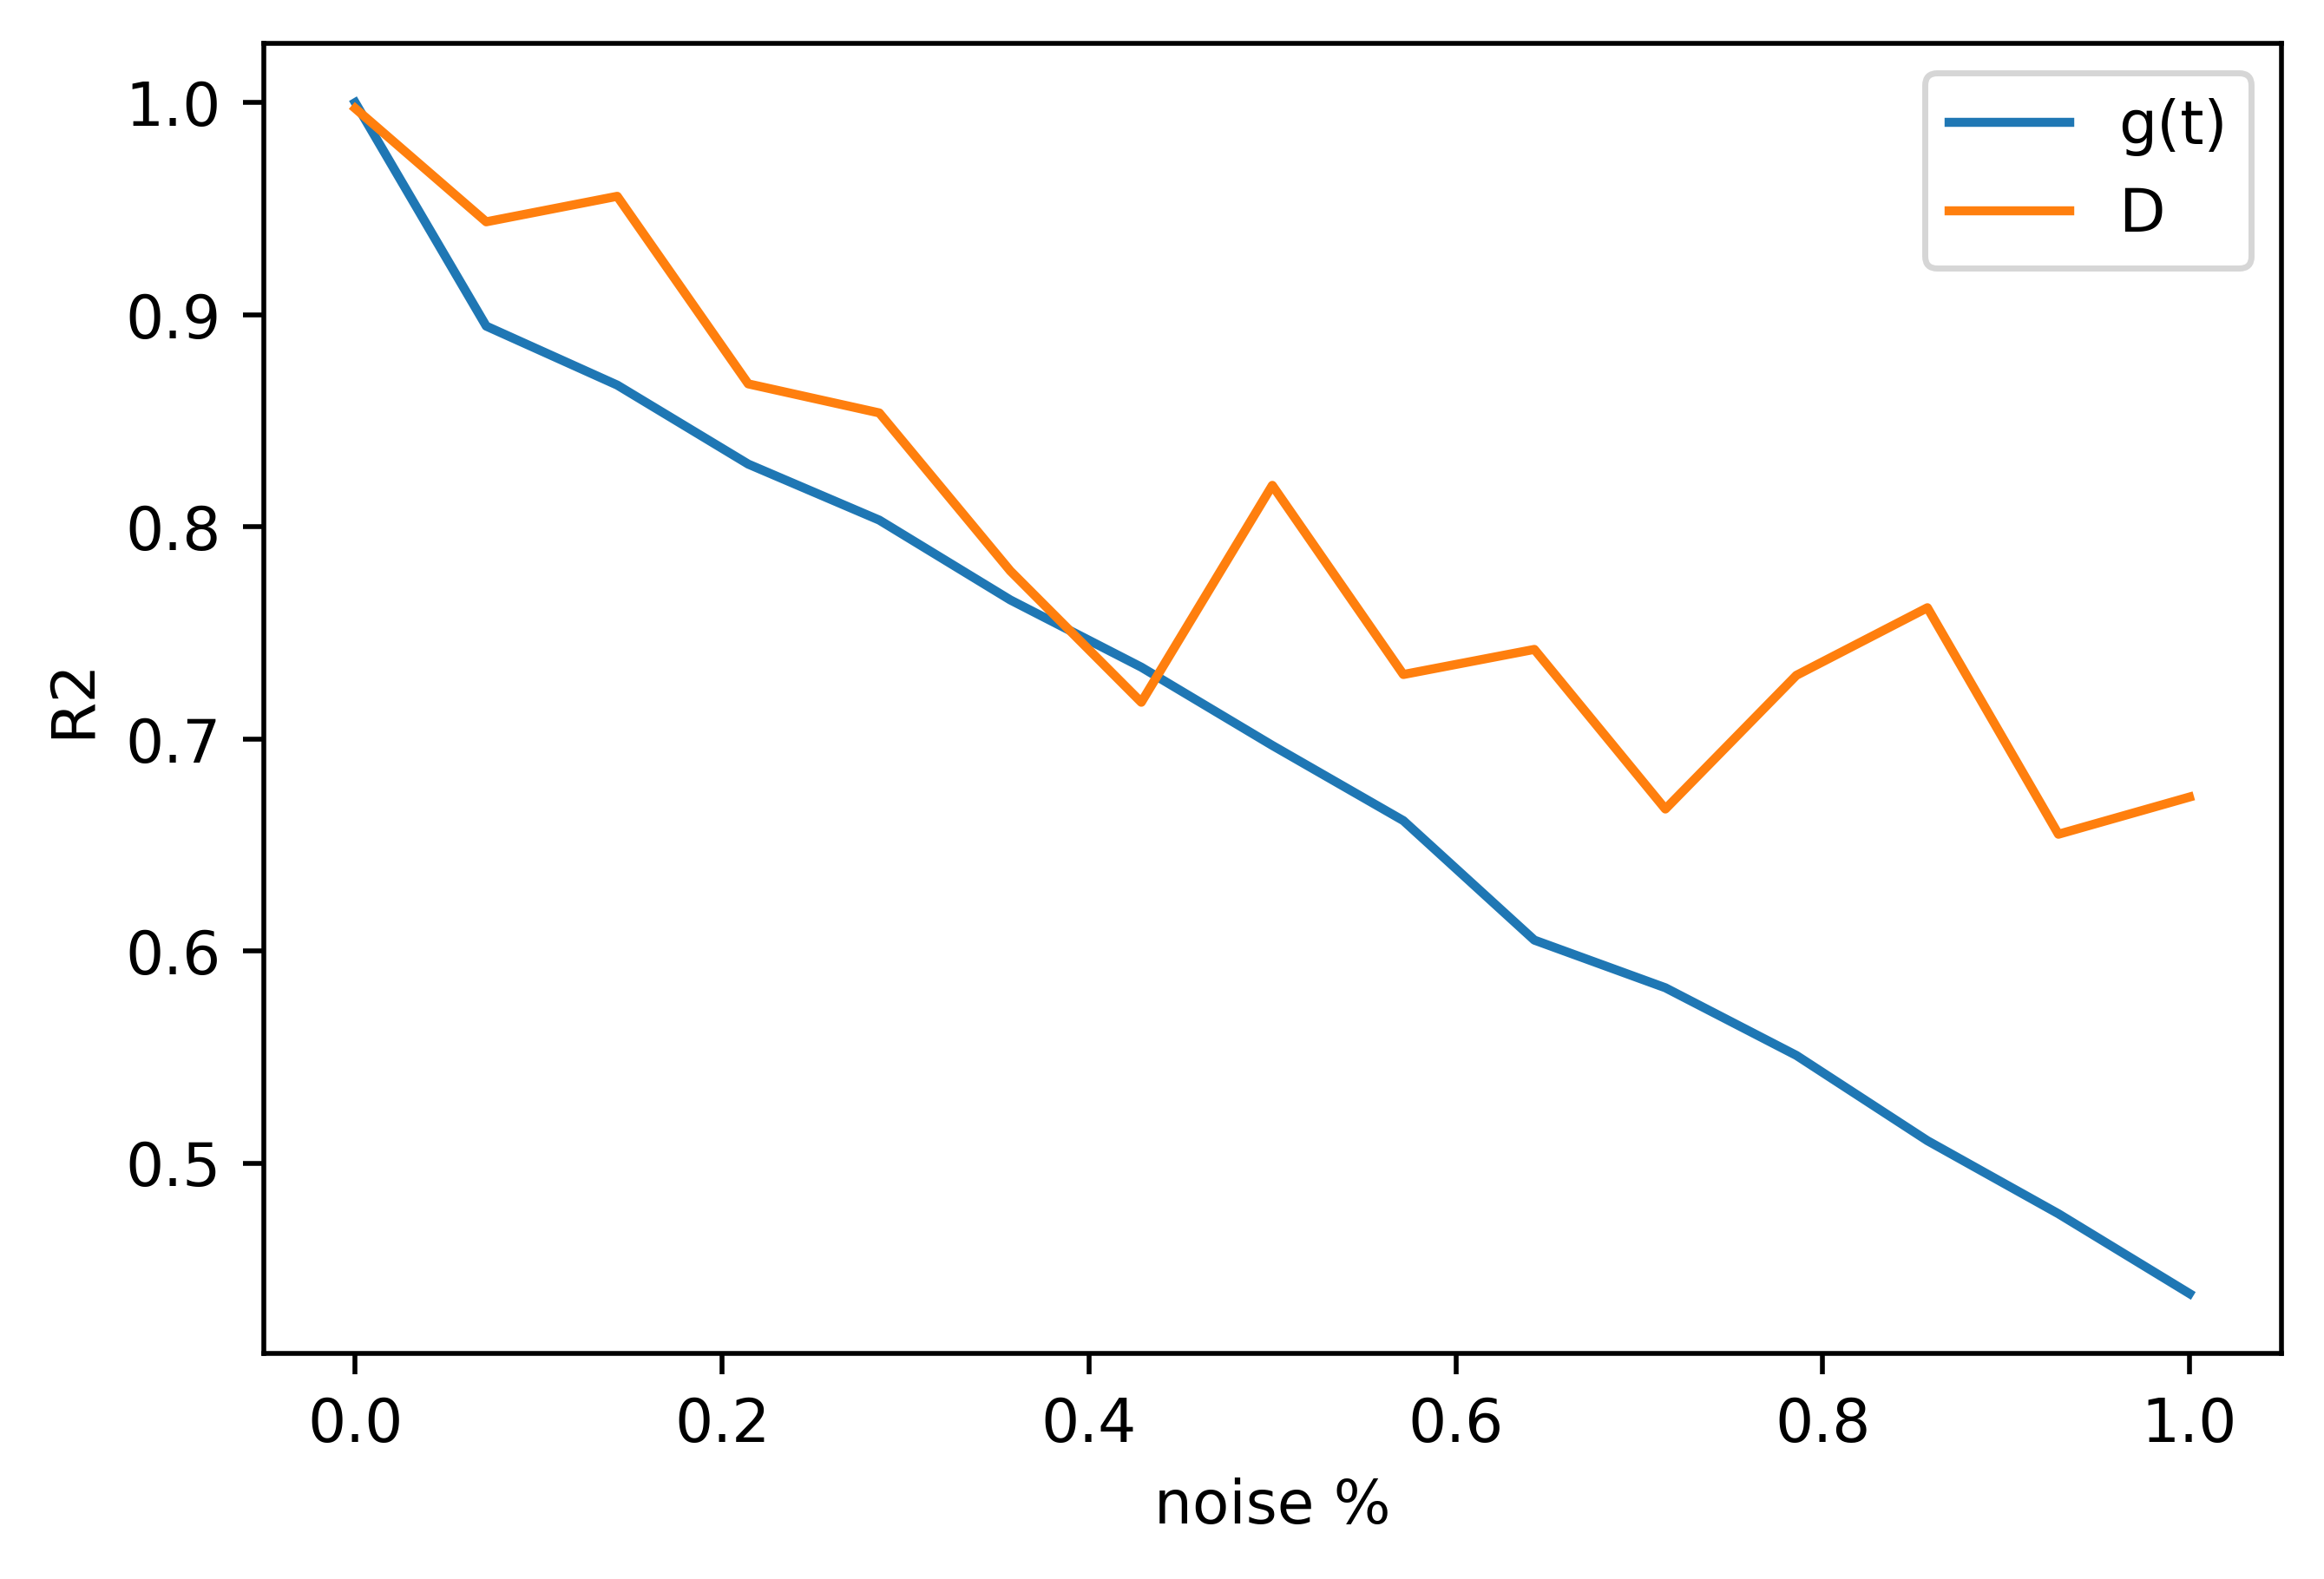

In [5]:
noises_test = list(r2_dict.keys())
plt.figure()
plt.plot(noises_test,[r2_dict[nt]["g"] for nt in noises_test],label="g(t)")
plt.plot(noises_test,[r2_dict[nt]["d"] for nt in noises_test],label="D")
plt.legend()
plt.xlabel("noise %")
plt.ylabel("R2")
plt.savefig("simulated_data_sens_x_g_classical.png")



In [6]:
r2_dict = {}

for numObs in range(5,len(labeling_theo[0])+1):

    g_preds = []
    d_preds = []
    l_preds = []
    l_observed = []
    l_theo = []

    
    for g,d,l_true in zip(gs,ds,labeling_theo):
        iso_obs = rd.sample(list(range(len(l_true))),k=numObs)
        iso_obs.sort()
        l_obs = []
        for z in range(len(l_true)):
            if z in iso_obs:
                l_obs.append(l_true[z])
            else:
                l_obs.append(0)
        l_obs = np.array(l_obs)/np.sum(l_obs)

        g_pred, d_pred, _, err, l_pred = helper.ISAFit_classical(T,N,l_obs,isa_func,iso_obs,np.array([.5,.5]))
        if g_pred < -.1 or g_pred > 1.1 or d_pred < -.1 or d_pred > 1.1:
            g_pred = 0
            d_pred = 0
        g_preds.append(g_pred)
        d_preds.append(d_pred)
        l_preds += list(l_pred)
        l_observed += list(l_obs)
        l_theo += list(l_true)


    r2_dict[numObs] = {}

    r2_dict[numObs]["g"] = r2_score(gs,g_preds)
    r2_dict[numObs]["d"] = r2_score(ds,d_preds)

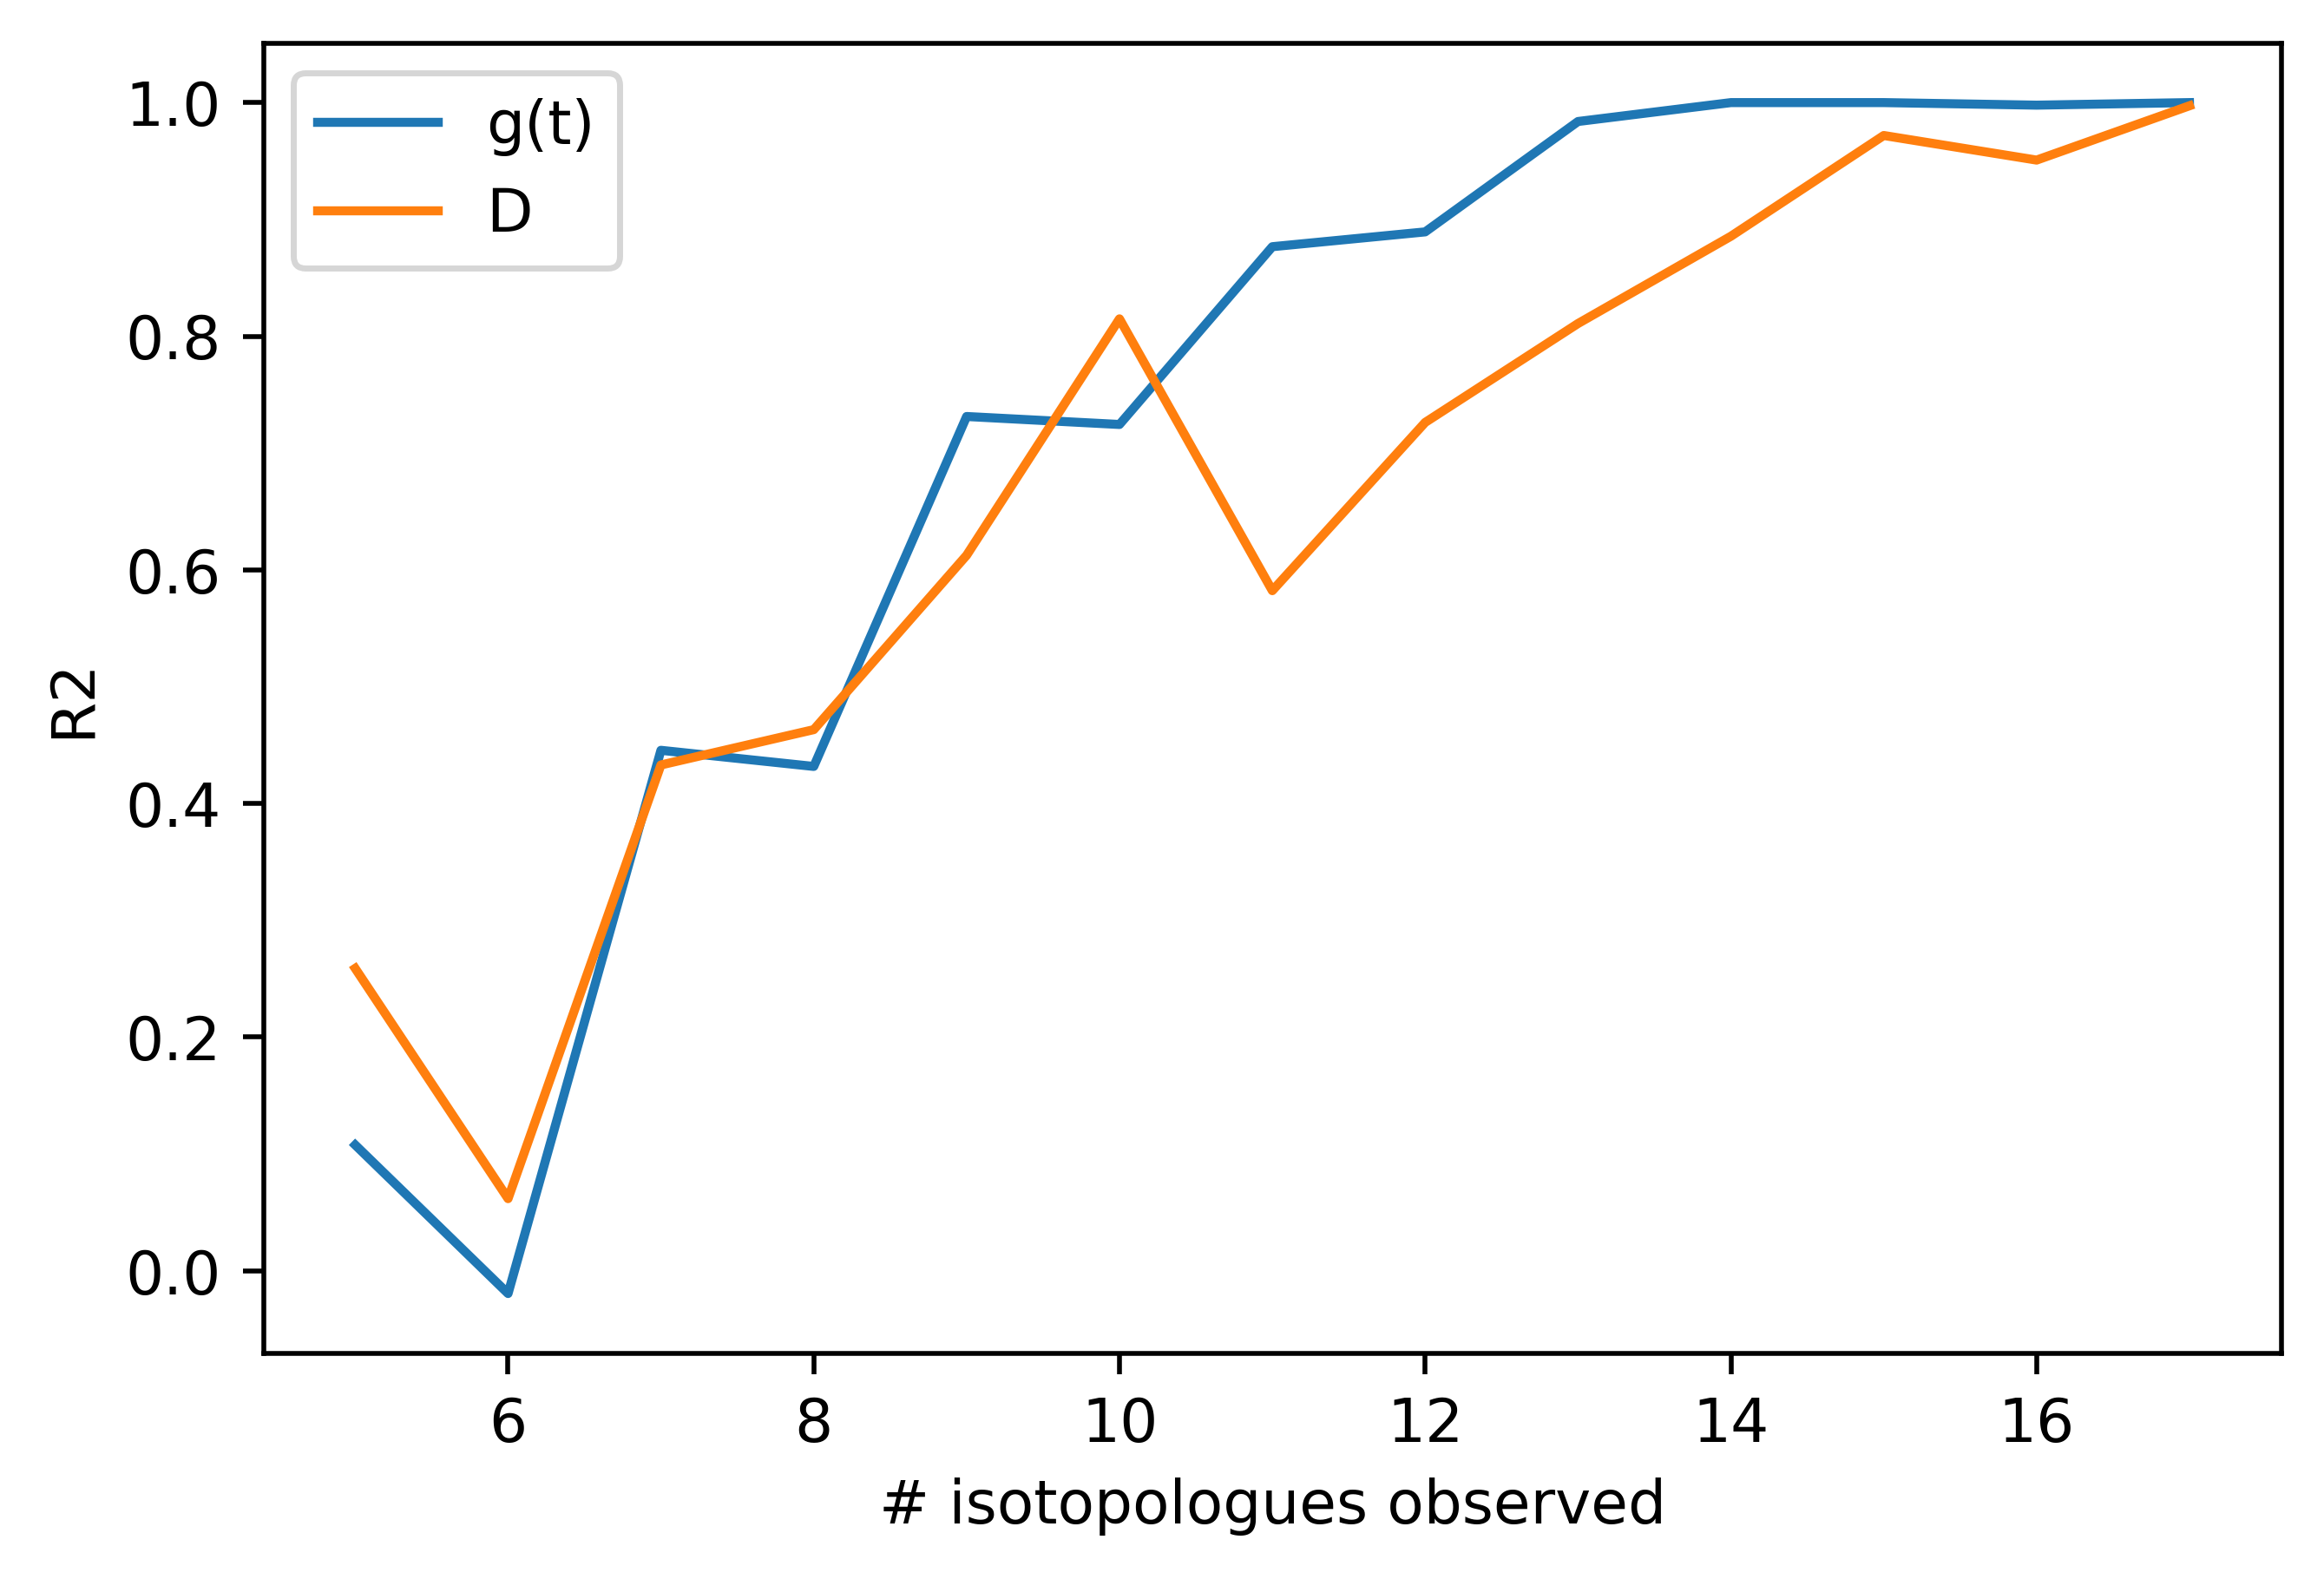

In [7]:
noises_test = list(r2_dict.keys())
plt.figure()
plt.plot(noises_test,[r2_dict[nt]["g"] for nt in noises_test],label="g(t)")
plt.plot(noises_test,[r2_dict[nt]["d"] for nt in noises_test],label="D")
plt.legend()
plt.xlabel("# isotopologues observed")
plt.ylabel("R2")
plt.savefig("simulated_data_sens_x_g_missing_values_classical.png")

NameError: name 'd_trues' is not defined

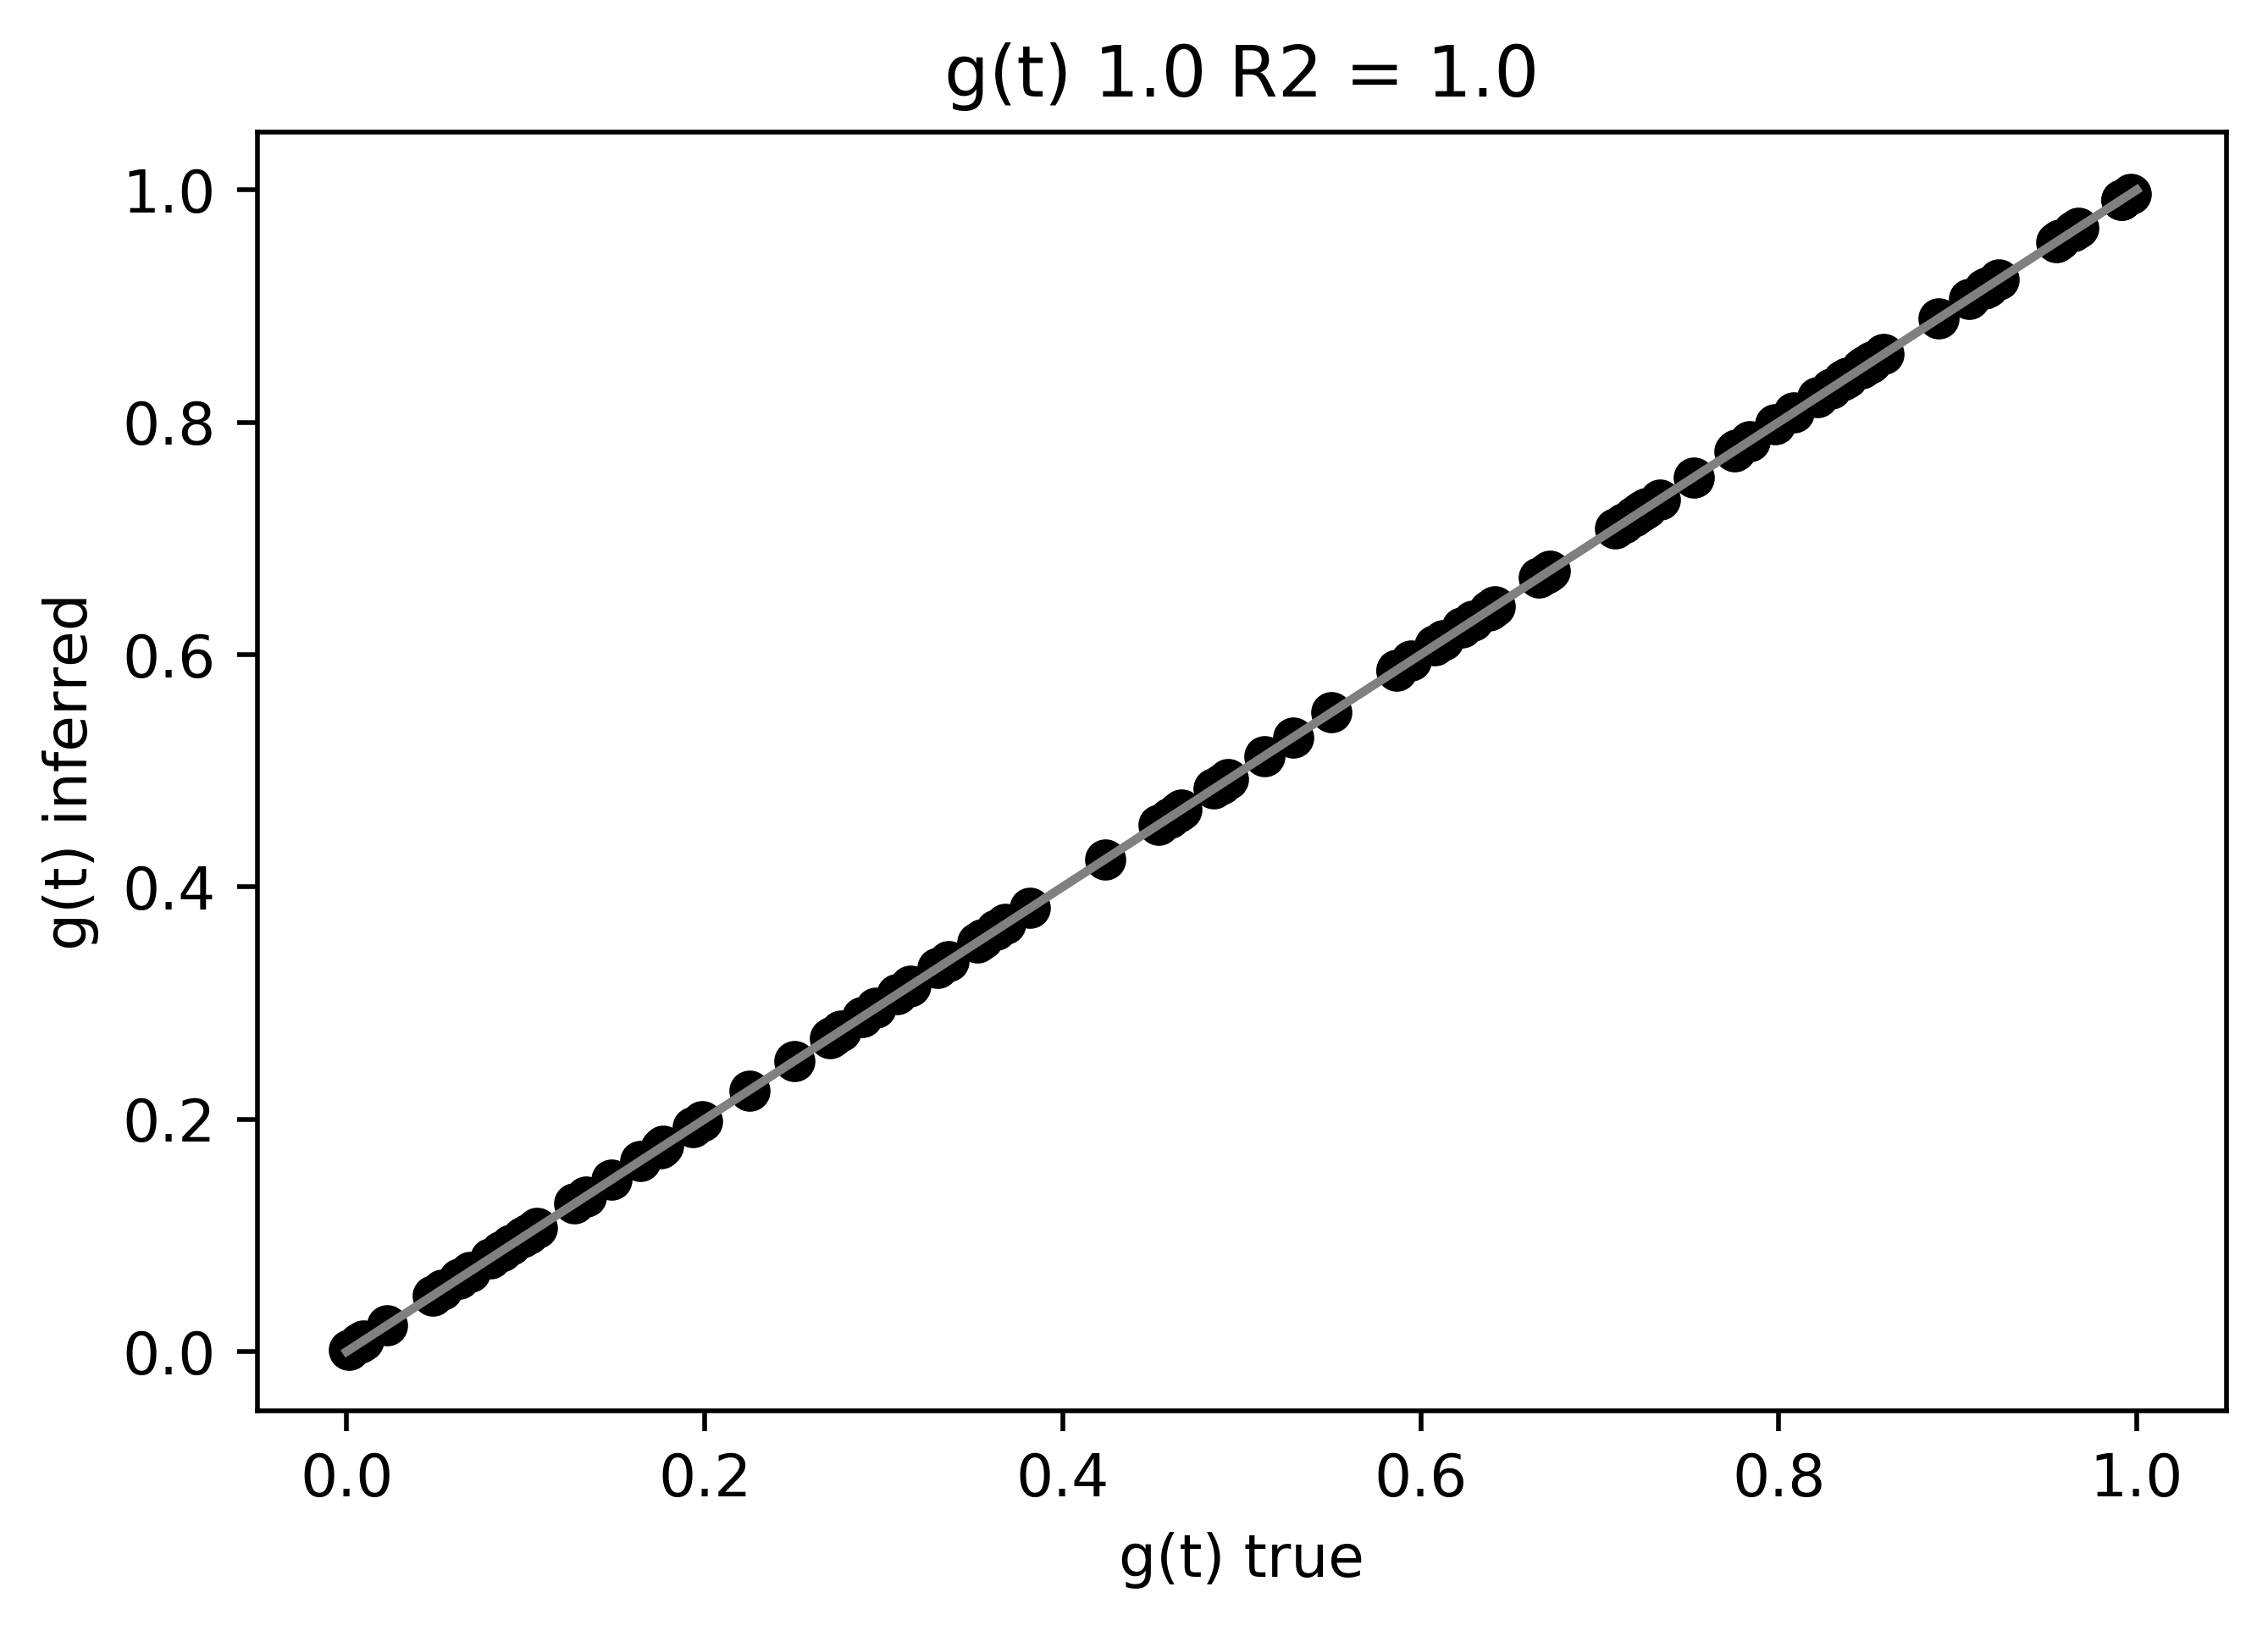

<Figure size 3000x2000 with 0 Axes>

In [8]:

plt.figure()
plt.scatter(gs,g_preds,color="black")
plt.plot([0,1],[0,1],color="grey")
plt.xlabel("g(t) true")
plt.ylabel("g(t) inferred")
plt.title("g(t) " + str(noiseFrac) + " R2 = " + str(np.round(r2_score(gs,g_preds),2)))

plt.figure()
plt.scatter(d_trues,d_preds,color="black")
plt.plot([0,1],[0,1],color="grey")
plt.xlabel("D true")
plt.ylabel("D inferred")
plt.title("D " + str(noiseFrac) + " R2 = " + str(np.round(r2_score(d_trues,d_preds),2)))

plt.figure()
plt.scatter(l_theo,l_preds,color="black")
plt.plot([0,1],[0,1],color="grey")
plt.xlabel("P true")
plt.ylabel("P inferred")
plt.title("P " + str(noiseFrac) + " R2 = " + str(np.round(r2_score(l_theo,l_preds),2)))


plt.figure()
plt.scatter(l_theo,l_observed,color="black")
plt.plot([0,1],[0,1],color="grey")
plt.xlabel("P true")
plt.ylabel("P observed")
plt.title("P " + str(noiseFrac) + " R2 = " + str(np.round(r2_score(l_theo,l_observed),2)))


plt.figure()
plt.scatter(l_observed,l_preds,color="black")
plt.plot([0,1],[0,1],color="grey")
plt.xlabel("P observed")
plt.ylabel("P predicted")
plt.title("P " + str(noiseFrac) + " R2 = " + str(np.round(r2_score(l_observed,l_preds),2)))

In [ ]:
print(T,N)

